In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, ndcg_score
import statsmodels.api as sm

In [3]:
# Load dataset
df = pd.read_csv('heart.csv')
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [4]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=334)

In [5]:
# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [6]:
# Build the Neural Network model
model = Sequential([
Dense(64, input_dim=x_train_scaled.shape[1], activation='relu'),
Dense(32, activation='relu'),
Dense(1, activation='sigmoid')
])


C:\Users\vignesh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [8]:
# Train the model
model.fit(x_train_scaled, y_train, epochs=50, batch_size=10, validation_data=(x_test_scaled, 
y_test))


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5609 - loss: 0.7023 - val_accuracy: 0.8525 - val_loss: 0.5250
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8168 - loss: 0.4985 - val_accuracy: 0.8525 - val_loss: 0.4481
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8450 - loss: 0.4165 - val_accuracy: 0.8525 - val_loss: 0.4132
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8571 - loss: 0.3415 - val_accuracy: 0.8525 - val_loss: 0.4110
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8669 - loss: 0.3413 - val_accuracy: 0.8361 - val_loss: 0.4217
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8399 - loss: 0.3426 - val_accuracy: 0.8525 - val_loss: 0.4172
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8835 - loss: 0.2766 - val_accuracy: 0.8361 - val_loss: 0.4287
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8875 - loss: 0.2649 - val_accuracy: 0.8525 - val_loss

In [9]:
# Neural Network Predictions
y_pred_nn = (model.predict(x_test_scaled) > 0.5).astype(int)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [10]:
# Logistic Regression using StatsModels
x_train_const = sm.add_constant(x_train)
x_test_const = sm.add_constant(x_test) # Add constant to the testing set

In [11]:
logit_model = sm.Logit(y_train, x_train_const)
result = logit_model.fit()


Optimization terminated successfully.
         Current function value: 0.333407
         Iterations 7


In [13]:
# Logistic Regression Predictions
y_pred_logistic = (result.predict(x_test_const) > 0.5).astype(int)

In [16]:
# Accuracy Metrics
def accuracy_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return precision, recall, f1
precision_nn, recall_nn, f1_nn = accuracy_metrics(y_test, y_pred_nn)
precision_logistic, recall_logistic, f1_logistic = accuracy_metrics(y_test, y_pred_logistic)
print(f"Neural Network - Precision: {precision_nn}, Recall: {recall_nn}, F1 Score: {f1_nn}")
print(f"Logistic Regression - Precision: {precision_logistic}, Recall: {recall_logistic}, F1 Score: {f1_logistic}")


Neural Network - Precision: 0.8333333333333334, Recall: 0.8064516129032258, F1 Score: 0.819672131147541
Logistic Regression - Precision: 0.8387096774193549, Recall: 0.8387096774193549, F1 Score: 0.8387096774193549


In [19]:
# Mean Reciprocal Rank (MRR)
def mean_reciprocal_rank(y_true, y_pred):
    ranks = []
    for true, pred in zip(y_true, y_pred):
        if true == pred:
            ranks.append(1)
    return np.mean(ranks)


In [20]:
# Calculate MRR
mrr_nn = mean_reciprocal_rank(y_test, y_pred_nn)
mrr_logistic = mean_reciprocal_rank(y_test, y_pred_logistic)
print(f"Neural Network - MRR: {mrr_nn}")
print(f"Logistic Regression - MRR: {mrr_logistic}")


Neural Network - MRR: 1.0
Logistic Regression - MRR: 1.0


In [21]:
from scipy.spatial.distance import pdist

In [22]:
# Intra-List Diversity
def intra_list_diversity(recommendations):
    if len(recommendations) <= 1:
        return 0
    distances = pdist(recommendations, metric='cosine')
    return np.mean(distances)


In [23]:
# Inter-List Diversity
def inter_list_diversity(recommendation_lists):
    diversities = [intra_list_diversity(recommendations) for recommendations in recommendation_lists]
    return np.mean(diversities)


In [24]:
# Assuming recommendations_nn and recommendations_logistic are the recommendation lists
recommendations_nn = model.predict(x_test_scaled) # Assuming these are item representations
recommendations_logistic = result.predict(x_test_const)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [25]:
# Convert Pandas Series to NumPy array
recommendations_logistic = recommendations_logistic.values

In [29]:
# Reshape recommendations_nn and recommendations_logistic if necessary
recommendations_nn = recommendations_nn.reshape(-1, 1) if len(recommendations_nn.shape) == 1 else recommendations_nn
recommendations_logistic = recommendations_logistic.reshape(-1, 1) if len(recommendations_logistic.shape) == 1 else recommendations_logistic


In [31]:
# Calculate diversity metrics
intra_div_nn = intra_list_diversity(recommendations_nn)
intra_div_logistic = intra_list_diversity(recommendations_logistic)
inter_div_nn = inter_list_diversity([recommendations_nn])
inter_div_logistic = inter_list_diversity([recommendations_logistic])
print(f"Neural Network - Intra-List Diversity: {intra_div_nn}, Inter-List Diversity: {inter_div_nn}")
print(f"Logistic Regression - Intra-List Diversity: {intra_div_logistic}, Inter-List Diversity: {inter_div_logistic}")


Neural Network - Intra-List Diversity: 0.0, Inter-List Diversity: 0.0
Logistic Regression - Intra-List Diversity: 0.0, Inter-List Diversity: 0.0


In [33]:
# Assuming you have a popularity measure for your items
# Replace 'popularity' with the correct column name representing item popularity in your DataFrame
item_popularity_column = 'popularity'
if item_popularity_column in df.columns:
    item_popularity = df[item_popularity_column].values 
else:
    print("Column 'popularity' not found in DataFrame.")


Column 'popularity' not found in DataFrame.


In [34]:
# Average Popularity
def average_popularity(recommendations, item_popularity):
    return np.mean([item_popularity[item] for item in recommendations])
# Novelty Score (inverse of popularity)
def novelty_score(recommendations, item_popularity):
    return np.mean([1 / item_popularity[item] for item in recommendations])

In [35]:
# Convert predictions to indices of recommended items
indices_nn = np.where(y_pred_nn == 1)[0]
indices_logistic = np.where(y_pred_logistic == 1)[0]


In [37]:
# Check if item_popularity is defined before using it
if 'item_popularity' in locals():
    avg_popularity_nn = average_popularity(indices_nn, item_popularity)
    avg_popularity_logistic = average_popularity(indices_logistic, item_popularity)
    novelty_nn = novelty_score(indices_nn, item_popularity)
    novelty_logistic = novelty_score(indices_logistic, item_popularity)
    print(f"Neural Network - Average Popularity: {avg_popularity_nn}, Novelty Score: {novelty_nn}")
    print(f"Logistic Regression - Average Popularity: {avg_popularity_logistic}, Novelty Score: {novelty_logistic}")
else:
    print("item_popularity is not defined.")

item_popularity is not defined.


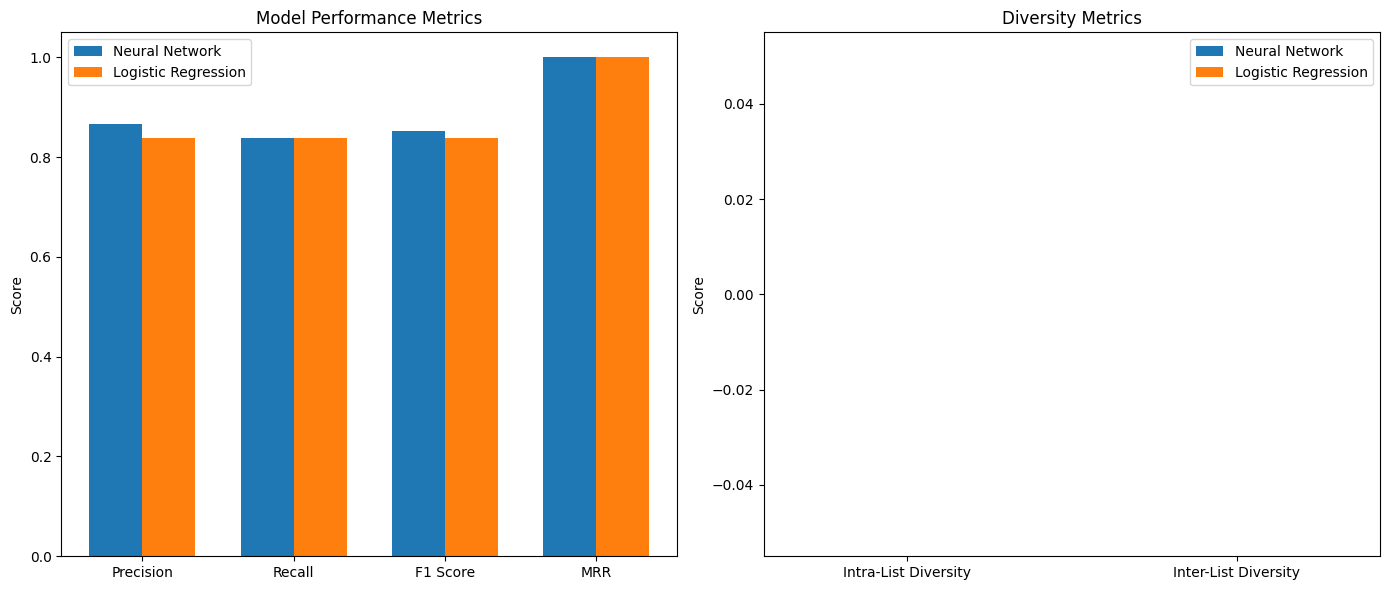

In [39]:
# Visualization
metrics = ['Precision', 'Recall', 'F1 Score', 'MRR']
nn_metrics = [precision_nn, recall_nn, f1_nn, mrr_nn]
logistic_metrics = [precision_logistic, recall_logistic, f1_logistic, mrr_logistic]

diversity_metrics = ['Intra-List Diversity', 'Inter-List Diversity']
nn_diversity = [intra_div_nn, inter_div_nn]
logistic_diversity = [intra_div_logistic, inter_div_logistic]

if 'item_popularity' in locals():
    popularity_metrics = ['Average Popularity', 'Novelty Score']
    nn_popularity = [avg_popularity_nn, novelty_nn]
    logistic_popularity = [avg_popularity_logistic, novelty_logistic]

# Plotting the metrics
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
x = np.arange(len(metrics))
width = 0.35
plt.bar(x - width/2, nn_metrics, width, label='Neural Network')
plt.bar(x + width/2, logistic_metrics, width, label='Logistic Regression')
plt.xticks(x, metrics)
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.legend()

plt.subplot(1, 2, 2)
x = np.arange(len(diversity_metrics))
plt.bar(x - width/2, nn_diversity, width, label='Neural Network')
plt.bar(x + width/2, logistic_diversity, width, label='Logistic Regression')
plt.xticks(x, diversity_metrics)
plt.ylabel('Score')
plt.title('Diversity Metrics')
plt.legend()

plt.tight_layout()
plt.show()

if 'item_popularity' in locals():
    plt.figure(figsize=(8, 4))

    x = np.arange(len(popularity_metrics))
    plt.bar(x - width/2, nn_popularity, width, label='Neural Network')
    plt.bar(x + width/2, logistic_popularity, width, label='Logistic Regression')
    plt.xticks(x, popularity_metrics)
    plt.ylabel('Score')
    plt.title('Popularity and Novelty Metrics')
    plt.legend()

    plt.tight_layout()
    plt.show()